In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense

numpy.random.seed(7)
dataframe = pandas.read_csv('passengers.csv', usecols=[1], # usecols=[1] : 1열의 데이터만 가지고 옴
                            engine='python', skipfooter=3) # 마지막 3개는 보지 않겠다.
dataset = dataframe.values
dataset = dataset.astype('float32')
train_size = int(len(dataset)*0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset), :]
print(len(train), len(test))

Using TensorFlow backend.
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_05\Anaconda3\envs

96 48


C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ICT01_05\Anaconda3\envs\tf_t

In [3]:
# window size로 독립변수와 종속변수를 분리
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [],[]
    for i in range(len(dataset)-look_back -1 ):
        a = dataset[i : (i+look_back),0] # 0~2
        dataX.append(a)
        dataY.append(dataset[i + look_back,0]) # 마지막 데이터를 y에 추가
    return numpy.array(dataX), numpy.array(dataY)

In [4]:
look_back = 2   # window size
# 자기상관성이 이전 2개를 보면 다음 한개를 알 수 있음
# 벡터 1개로부터 종속변수 돌립변수
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
print(trainX.shape) # 93,2  전체 사이즈 줄어둠
model = Sequential()
# 2x8 차원확대
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

(93, 2)

Epoch 1/200
 - 0s - loss: 90085.9055
Epoch 2/200
 - 0s - loss: 78715.3146
Epoch 3/200
 - 0s - loss: 70645.5389
Epoch 4/200
 - 0s - loss: 64820.6602
Epoch 5/200
 - 0s - loss: 60568.5388
Epoch 6/200
 - 0s - loss: 57493.5670
Epoch 7/200
 - 0s - loss: 55295.3161
Epoch 8/200
 - 0s - loss: 53687.1267
Epoch 9/200
 - 0s - loss: 52534.2290
Epoch 10/200
 - 0s - loss: 51639.1572
Epoch 11/200
 - 0s - loss: 50881.3457
Epoch 12/200
 - 0s - loss: 50093.0191
Epoch 13/200
 - 0s - loss: 49141.9657
Epoch 14/200
 - 0s - loss: 47788.4251
Epoch 15/200
 - 0s - loss: 45751.2486
Epoch 16/200
 - 0s - loss: 42666.2211
Epoch 17/200
 - 0s - loss: 38328.0491
Epoch 18/200
 - 0s - loss: 32632.8639
Epoch 19/200
 - 0s - loss: 26079.3964
Epoch 20/200
 - 0s - loss: 19203.1052
Epoch 21/200
 - 0s - loss: 13081.7069
Epoch 22/200
 - 0s - loss: 8136.8942
Epoch 23/200
 - 0s - loss: 4791.5954
Epoch 24/200
 - 0s - loss: 2652.5190
Epoch 25/200
 - 0s - loss: 1580.7391
Epoch 26/200
 - 0s - loss: 1023.4857
Epoch 27/200
 - 0

In [5]:
# 데이터 분할(시계열 데이터 형태에 일치 시킴)
# house 집값 예측 13, 종속변수
trainScore = model.evaluate(trainX, trainY, verbose = 0)
print('Train Score : %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))

Train Score : 564.76 MSE (23.76 RMSE)


In [6]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
# R에는 auto_arima 계수를 파악
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_csv('austr.csv', skipfooter=2)
print(df.head())
df.columns=['Month', 'beer']
print(df.head())

     Month  \
0  1956-01   
1  1956-02   
2  1956-03   
3  1956-04   
4  1956-05   

   Monthly beer production in Australia: megalitres. Includes ale and stout. Does not include beverages with alcohol percentage less than 1.15. Jan 1956 ? Aug 1995  
0                                               93.2                                                                                                                 
1                                               96.0                                                                                                                 
2                                               95.2                                                                                                                 
3                                               77.1                                                                                                                 
4                                               70.9                                 

In [8]:
print(df.info())
df.Month = pd.to_datetime(df.Month) # 시간데이터 -> 문자열로 입력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
Month    476 non-null object
beer     476 non-null float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB
None


In [9]:
df = df.set_index('Month') # 인덱스를 시간
df.index.freq ='MS' # 월단위의 데이터

[Text(0, 0.5, 'Total Production'), Text(0.5, 0, 'Dates')]

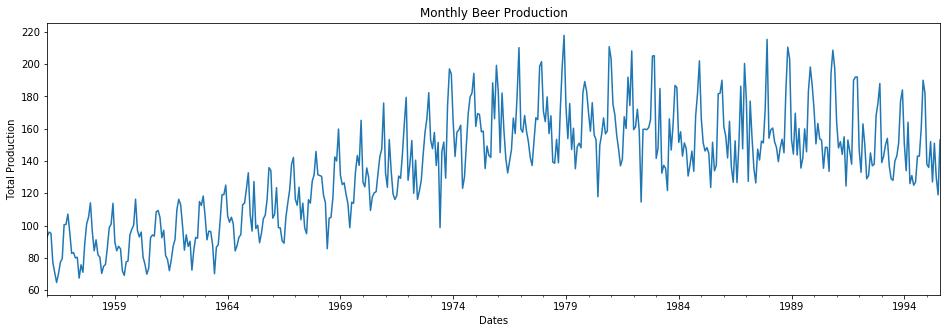

In [10]:
ax = df['beer'].plot(figsize = (16,5), title = 'Monthly Beer Production')
ax.set(xlabel='Dates', ylabel='Total Production')

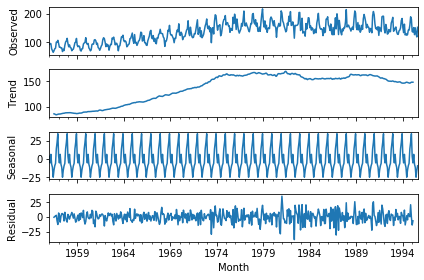

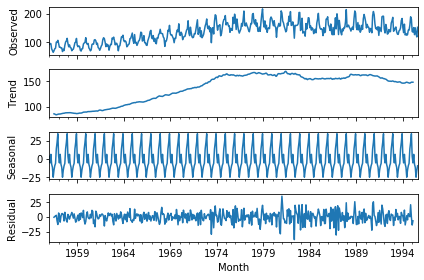

In [11]:
# Trend 경향성 Seasonal 계절성 Residual 기타
a = seasonal_decompose(df["beer"], model="add")
a.plot()

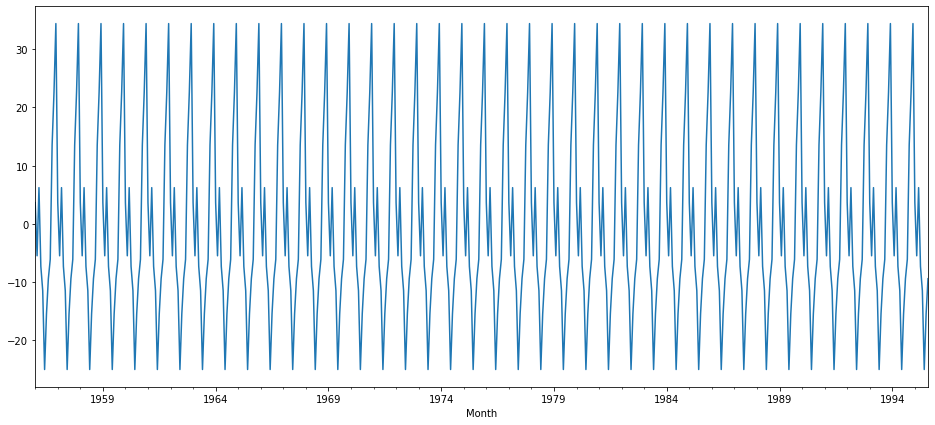

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,7))
a.seasonal.plot()

In [13]:
# 대문자 P,D,Q(계절성 모델) # 차분 차수
# 소문자 p,d,q(비계절성모델)
auto_arima(df['beer'], seasonal = True,
           # m : 계절성, max_p, max_d, max_q 상한값
           m = 12, max_p=7, max_d=5, max_q=7, max_P=4, max_D=4, max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  476
Model:             SARIMAX(3, 1, 4)x(2, 0, 2, 12)   Log Likelihood               -1728.991
Date:                            Tue, 11 Feb 2020   AIC                           3483.981
Time:                                    13:28:07   BIC                           3538.104
Sample:                                         0   HQIC                          3505.265
                                            - 476                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.676e-05      0.004      0.004      0.996      -0.007       0.007
ar.L1         -0.3356      0.040     -8.491      0.000      -0.413      -0.258
ar.L2         -0.0566      0.045     -1.246      0.213      -0.146       0.032
ar.L3          0.8059      0.040     20.232      0.000       0.728       0.884
ma.L1         -0.7336      0.034    -21.632      0.000      -0.800      -0.667
ma.L2         -0.1941      0.032     -6.091      0.000      -0.257      -0.132
ma.L3         -0.7920      0.030    -26.717      0.000      -0.850      -0.734
ma.L4          0.8463      0.031     27.032      0.000       0.785       0.908
ar.S.L12       0.0527      0.053      1.001      0.317      -0.051       0.156
ar.S.L24       0.9440      0.053     17.771      0.000       0.840       1.048
ma.S.L12       0.1058      0.048      2.207      0.027       0.012       0.200
ma.S.L24      -0.8325      0.060    -13.845      0.000      -0.950      -0.715
sigma2        78.4909      4.175     18.802      0.000      70.309      86.673
===================================================================================
Ljung-Box (Q):                       50.73   Jarque-Bera (JB):                79.31
Prob(Q):                              0.12   Prob(JB):                         0.00
Heteroskedasticity (H):               3.11   Skew:                            -0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Stata ARIMA 아리마모형(비정상적데이터분석이 가능)
# AR, MA, ARMA -> 정상성을 띈 시계열 분석 모델
train_data = df[:len(df)-12]
test_data = df[len(df-12) :]
arima_model = SARIMAX(train_data['beer'], order=(3, 1, 4), seasonal_order=(2, 0, 2, 12))
arima_result = arima_model.fit()
arima_result.summary()
# 자기상관성 Ljung-Box
# Jargue-Bera 정규분포의 적합도 정도 확인  정규분포 정상값 3

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               beer   No. Observations:                  464
Model:             SARIMAX(3, 1, 4)x(2, 0, 2, 12)   Log Likelihood               -1687.859
Date:                            Tue, 11 Feb 2020   AIC                           3399.718
Time:                                    13:28:16   BIC                           3449.371
Sample:                                01-01-1956   HQIC                          3419.265
                                     - 08-01-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3288      0.063     -5.260      0.000      -0.451      -0.206
ar.L2         -0.0484      0.072     -0.672      0.502      -0.189       0.093
ar.L3          0.8041      0.062     12.923      0.000       0.682       0.926
ma.L1         -0.7178      0.050    -14.286      0.000      -0.816      -0.619
ma.L2         -0.1711      0.032     -5.379      0.000      -0.233      -0.109
ma.L3         -0.8045      0.028    -28.342      0.000      -0.860      -0.749
ma.L4          0.8054      0.042     19.235      0.000       0.723       0.888
ar.S.L12       0.0837      0.088      0.951      0.342      -0.089       0.256
ar.S.L24       0.9107      0.088     10.366      0.000       0.739       1.083
ma.S.L12       0.1296      0.080      1.623      0.105      -0.027       0.286
ma.S.L24      -0.7745      0.076    -10.191      0.000      -0.923      -0.626
sigma2        77.2390      3.960     19.504      0.000      69.477      85.001
===================================================================================
Ljung-Box (Q):                       53.92   Jarque-Bera (JB):                74.76
Prob(Q):                              0.07   Prob(JB):                         0.00
Heteroskedasticity (H):               3.79   Skew:                            -0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
arima_pred = arima_result.predict(start = len(train_data), 
                                 end = len(df)-1, typ = "levels").rename("Arima Predictions")
arima_pred

1994-09-01    133.052487
1994-10-01    158.066333
1994-11-01    178.894140
1994-12-01    180.071698
1995-01-01    141.376690
1995-02-01    138.973733
1995-03-01    147.740557
1995-04-01    134.416543
1995-05-01    134.259178
1995-06-01    117.814287
1995-07-01    129.299854
1995-08-01    137.900853
Freq: MS, Name: Arima Predictions, dtype: float64

In [17]:
test_data['beer'].plot(figsize=(16, 5), legend=True)
arima_pred.plot(legend=True)

TypeError: no numeric data to plot

In [18]:
from sklearn.preprocessing import MinMaxScaler
# 1 2 3 4 5 6 7 8 9 10  serial data => sequential data
# window size 1 2 target 3
# 2 3 target 4
# [0], [1], [2]
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required.

In [58]:
from keras.preprocessing.sequence import TimeseriesGenerator
import numpy as np
data = np.array([[i] for i in range(50)])
targets = np.array([[i] for i in range(50)])
data_gen = TimeseriesGenerator(data, targets, length=10, sampling_rate = 2, batch_size = 2)
# 2개씩 건너뛰면서
# [5, 5]
assert len(data_gen) == 20
batch_0 = data_gen[0]
batch_0

(array([[[0],
         [2],
         [4],
         [6],
         [8]],
 
        [[1],
         [3],
         [5],
         [7],
         [9]]]), array([[10],
        [11]]))

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size = 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu',
                   input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss = 'mse')
lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 200)               161600    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


In [21]:
 lstm_model.fit_generator(generator, epochs=20)

Epoch 1/20
452/452 [==============================] - 6s 12ms/step - loss: 0.0263
Epoch 2/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0139
Epoch 3/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0105
Epoch 4/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0083
Epoch 5/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0090
Epoch 6/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0075
Epoch 7/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0072
Epoch 8/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0069
Epoch 9/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0074
Epoch 10/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0071
Epoch 11/20
452/452 [==============================] - 5s 12ms/step - loss: 0.0070
Epoch 12/20
452/452 [==============================] - 5s 11ms/step - loss: 0.0067
Epoch 13/20
4

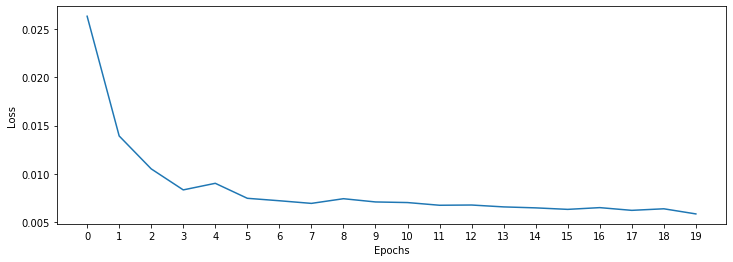

In [22]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12, 4))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)), losses_lstm)

# Embeddings

In [2]:
import re
import numpy as np
from keras.preprocessing.sequence import pad_sequences # padding
from keras.preprocessing.text import one_hot
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense # vectorization

In [44]:
docs = ['Well done!', 'Good work', 'Great effort', 'nice work', 'Excellent!',
        'Weak', 'Poor effort!', 'not good', 'poor work', 'Could have done better.']


labels = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0] 

In [45]:
# 중요 단어 10 개 : dictionary
# Well, done, Good, work, Great, effort ....
own_embedding_vocab_size = 10
encoded_docs_oe = [one_hot(d, own_embedding_vocab_size) for d in docs]
print(encoded_docs_oe)

[[4, 3], [3, 6], [2, 5], [9, 6], [3], [9], [1, 5], [8, 3], [1, 6], [8, 5, 3, 1]]


In [46]:
maxlen = 5
# 채우는 위치 post - 뒤
padded_docs_oe = pad_sequences(encoded_docs_oe, maxlen = maxlen, padding='post')
print(padded_docs_oe)

[[4 3 0 0 0]
 [3 6 0 0 0]
 [2 5 0 0 0]
 [9 6 0 0 0]
 [3 0 0 0 0]
 [9 0 0 0 0]
 [1 5 0 0 0]
 [8 3 0 0 0]
 [1 6 0 0 0]
 [8 5 3 1 0]]


In [47]:
model = Sequential()
model.add(Embedding(input_dim=own_embedding_vocab_size, output_dim=32, input_length=maxlen))
model.add(Flatten())
# binary_crossentropy 둘 중 한개로 분류
model.add(Dense(1, activation='sigmoid')) # 0.5 기준

In [48]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_docs_oe, labels, epochs=50, verbose=0)
loss, accuracy = model.evaluate(padded_docs_oe, labels, verbose=0)
print('Accuracy : %0.3f'%accuracy)

Accuracy : 0.900


# 문제 : 'Good work'에 대하여 예측해 보세요

In [41]:
# labels = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0] 

In [42]:

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.fit(padded_docs_oe, labels, epochs=50, verbose=0)
# loss, accuracy = model.evaluate(padded_docs_oe, labels, verbose=0)
# print('Accuracy : %0.3f'%accuracy)

Accuracy : 0.900


In [51]:
word = "Good work"
word_docs_oe = [one_hot(word, own_embedding_vocab_size)]
word_oe = pad_sequences(word_docs_oe, maxlen=maxlen, padding='post')
pred = model.predict(word_oe)
import numpy as np
np.round(pred)
print(pred)

[[0.6500415]]


# 11,228개 newswires : Reuters,    labeled over 46 topics

In [17]:
from keras.datasets import reuters
from keras.utils import np_utils
from keras.preprocessing.text import Tokenizer # 여러 개의 문장처리
import numpy as np

In [4]:
max_words = 1000
batch_size = 100
nb_epoch = 200
# np_load_old = np.load
# np.load = lambda *a, **k : np_load_old(*a, allow_pickle=True, **k)
(X_train, y_train), (X_test, y_test) = reuters.load_data(nb_words=max_words, test_split=0.2)
# np.load=np_load_old
nb_classes = np.max(y_train)+1
tokenizer = Tokenizer(nb_words=max_words)

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [5]:
# 문서는 행, 열은 단어의 집합
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [4]:
from keras.layers import Dropout
model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

NameError: name 'max_words' is not defined

In [ ]:
histoy = model.fit(X_train, Y_train, nb_epoch = nb_epoch, batch_size = batch_size,
                  verbose=0, validation_split=0.1)
score = model.evaluate(X_test, Y_test, batch_size = batch_size, verbose = 1)
print("\n\nModel Accuracy : %.2f%%"%(score[1]*100))
print("Model loss : %.2f%%" %(score[0]*100))

C:\Users\ICT01_05\Anaconda3\envs\tf_test\lib\site-packages\ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


# wordcloud

- conda install nltk
- conda install gensim
- pip install Pyro4
- pip install jpype1
- pip install konlpy
- pip install simplejson
- pip install pygame
- pip install pytagcloud
- conda install -c conda-forge jpype1

- 환경변수 - java home 
- classpath
- %classpath%

In [1]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Twitter
res=requests.get('https://sports.v.daum.net/v/20181227140914322')

In [12]:
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.select('.article_view')[0]
text = "".join(p.get_text() for p in body.find_all('p'))
t = Twitter()
tokens_ko = t.nouns(text)
ko = nltk.Text(tokens_ko, name = '스포츠')
ko.vocab().most_common(10)
data = ko.vocab().most_common(500)
tmp_data = dict(data)

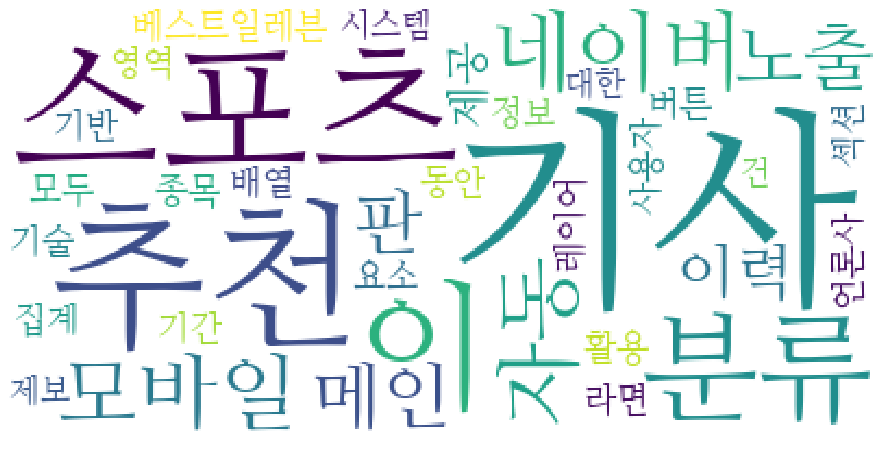

In [13]:
wordcloud = WordCloud(font_path='Library/Fonts/NanumMyeongjo.ttf', background_color='white',).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 문제 : 오늘 뉴스 중에 한 페이지를 선택해서 wordcloud출력

In [19]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from konlpy.tag import Twitter
res=requests.get('https://sports.news.naver.com/news.nhn?oid=343&aid=0000096937')

In [45]:
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.select('.content_area')[0]
# text = "".join(p.get_text() for p in body.find_all('div'))
text = body.get_text()
t = Twitter()
tokens_ko = t.nouns(text)
ko = nltk.Text(tokens_ko, name = '스포츠')
ko.vocab().most_common(10)
data = ko.vocab().most_common(500)
tmp_data = dict(data)

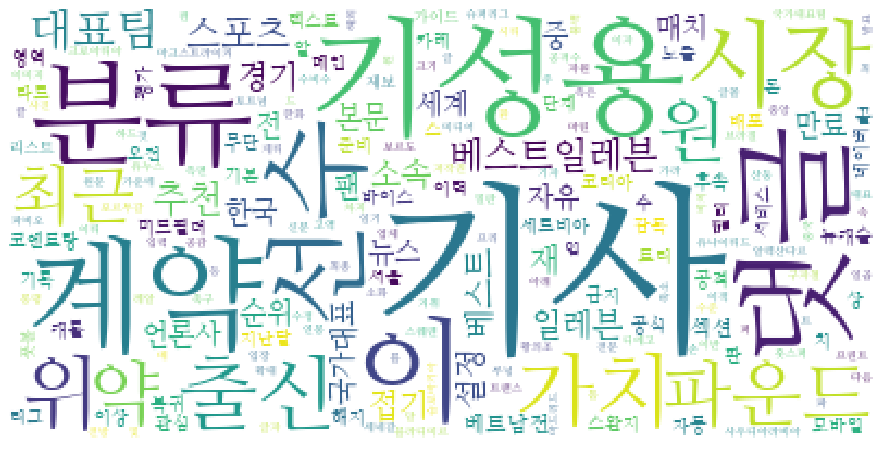

In [46]:
wordcloud = WordCloud(font_path='Library/Fonts/NanumMyeongjo.ttf', background_color='white',).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [47]:
soup = BeautifulSoup(res.content, 'html.parser')
body = soup.select('.content_area')[0]
text = "".join(p.get_text() for p in body.find_all('div'))
# text = body.get_text()
t = Twitter()
tokens_ko = t.nouns(text)
ko = nltk.Text(tokens_ko, name = '스포츠')
ko.vocab().most_common(10)
data = ko.vocab().most_common(500)
tmp_data = dict(data)

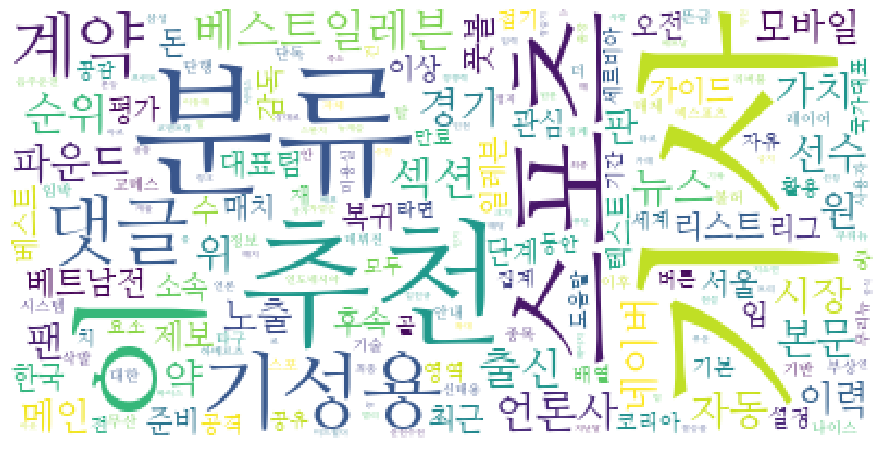

In [48]:
wordcloud = WordCloud(font_path='Library/Fonts/NanumMyeongjo.ttf', background_color='white',).generate_from_frequencies(tmp_data)
plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# LSTM
- 분류 : 감정분류(긍, 부정)

In [2]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import numpy as np
# imdb 는 one-hot 되어있기 때문에 바로 padding함
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=2000)
x_train = sequence.pad_sequences(x_train, maxlen = 80)
x_test = sequence.pad_sequences(x_test, maxlen = 80)
print(x_train[1])

[ 125   68    2    2   15  349  165    2   98    5    4  228    9   43
    2 1157   15  299  120    5  120  174   11  220  175  136   50    9
    2  228    2    5    2  656  245    2    5    4    2  131  152  491
   18    2   32    2 1212   14    9    6  371   78   22  625   64 1382
    9    8  168  145   23    4 1690   15   16    4 1355    5   28    6
   52  154  462   33   89   78  285   16  145   95]


In [3]:
model = Sequential()
# 단어장의 크기
model.add(Embedding(2000, 128))
model.add(LSTM(128, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [4]:
model.fit(x_train, y_train, batch_size = 32, epochs = 15, validation_data = (x_test, y_test))


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 39s 2ms/step - loss: 0.4822 - accuracy: 0.7692 - val_loss: 0.3995 - val_accuracy: 0.8246
Epoch 2/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.4097 - accuracy: 0.8173 - val_loss: 0.3860 - val_accuracy: 0.8288
Epoch 3/15
25000/25000 [==============================] - 39s 2ms/step - loss: 0.3609 - accuracy: 0.8423 - val_loss: 0.3795 - val_accuracy: 0.8289
Epoch 4/15
25000/25000 [==============================] - 40s 2ms/step - loss: 0.3277 - accuracy: 0.8581 - val_loss: 0.3756 - val_accuracy: 0.8315
Epoch 5/15
25000/25000 [==============================] - 39s 2ms/step - loss: 0.3050 - accuracy: 0.8683 - val_loss: 0.3835 - val_accuracy: 0.8379
Epoch 6/15
25000/25000 [==============================] - 39s 2ms/step - loss: 0.2808 - accuracy: 0.8822 - val_loss: 0.3873 - val_accuracy: 0.8356
Epoch 7/15
25000/25000 [==============================] - 39s 2ms/s

In [6]:
dictionary = imdb.get_word_index(path='imdb_word_index.json')
imdb_key = dictionary.keys()
list(imdb_key)[1]

1646592/1641221 [==============================] - 1s 1us/step


'tsukino'

# 숙제
# 1. x_train[1] 문장으로 변환해 보시요

In [26]:
for i in range(len(x_train[1])):
    dict = list(imdb_key)[x_train[1][i]]
    print(dict)

hj
'pleasure
nunnery
nunnery
harpo's
norliss
assimilates
nunnery
stern
woods
vani
golem
trawling
thrace
nunnery
photon
harpo's
feeling
beswick
woods
beswick
kuei
comically
approporiately
welcomed
post's
273
trawling
nunnery
golem
nunnery
woods
nunnery
humbled
ugghhh
nunnery
woods
vani
nunnery
gershon
chapters'
conditioned
acurately
nunnery
bravora
nunnery
being
'royale
trawling
spiders
sturgess
babaganoosh
rumbustious
teenager's
videodrome
hetfield's
trawling
woody
dongen
pinto
familiarness
vani
walberg
harpo's
canet
vani
unwelcomed
woods
hangin'
spiders
275
uselessness
tonino
grueling
cobblers
babaganoosh
mutilated
canet
pinto
gateshead


# 2. model.summary를 해보고 가중치 사이즈를 계산해보시요

In [28]:
model.summary() 
# LSTM 가중치 : 128x128
# dense 가중치 : 128x1

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         256000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 387,713
Trainable params: 387,713
Non-trainable params: 0
_________________________________________________________________
